**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Ant Man
- Hulk
- Iron Man
- Thor
- Wasp

# Research Question

-  Include a specific, clear data science question.
-  Make sure what you're measuring (variables) to answer the question is clear

What is your research question? Include the specific question you're setting out to answer. This question should be specific, answerable with data, and clear. A general question with specific subquestions is permitted. (1-2 sentences)



## Background and Prior Work


- Include a general introduction to your topic
- Include explanation of what work has been done previously
- Include citations or links to previous work

This section will present the background and context of your topic and question in a few paragraphs. Include a general introduction to your topic and then describe what information you currently know about the topic after doing your initial research. Include references to other projects who have asked similar questions or approached similar problems. Explain what others have learned in their projects.

Find some relevant prior work, and reference those sources, summarizing what each did and what they learned. Even if you think you have a totally novel question, find the most similar prior work that you can and discuss how it relates to your project.

References can be research publications, but they need not be. Blogs, GitHub repositories, company websites, etc., are all viable references if they are relevant to your project. It must be clear which information comes from which references. (2-3 paragraphs, including at least 2 references)

 **Use inline citation through HTML footnotes to specify which references support which statements** 

For example: After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Use a minimum of 2 or 3 citations, but we prefer more.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) You need enough to fully explain and back up important facts. 

Note that if you click a footnote number in the paragraph above it will transport you to the proper entry in the footnotes list below.  And if you click the ^ in the footnote entry, it will return you to the place in the main text where the footnote is made.

To understand the HTML here, `<a name="#..."> </a>` is a tag that allows you produce a named reference for a given location.  Markdown has the construciton `[text with hyperlink](#named reference)` that will produce a clickable link that transports you the named reference.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.


# Hypothesis



- Include your team's hypothesis
- Ensure that this hypothesis is clear to readers
- Explain why you think this will be the outcome (what was your thinking?)

What is your main hypothesis/predictions about what the answer to your question is? Briefly explain your thinking. (2-3 sentences)

# Data

## Data overview

Since we are using multiple datasets, we will need to effectively combine them. Our two main sources of data will be player performance, and then relevant news about the major sports leagues. We will cross reference the dates of when the relevant news happened, and then analyze the corresponding players performance following this.

### Tweets about NFL, NBA, MLB in the Last 10 Years

In [28]:
#WILL NOT RUN IN JUPYTER NOTEBOOK
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import csv

options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=options)
core_url = 'https://twitter.com/search?q=(nfl%20OR%20mlb%20OR%20nba)%20(from%3AMailOnline%20OR%20from%3ATMZ%20OR%20from%3AYahooNews%20OR%20from%3ANYTimes%20OR%20from%3ACNN%20OR%20from%3AFoxNews%20OR%20from%3ANYPost%20OR%20from%3Aguardian%20OR%20from%3ARollingStone%20OR%20from%3ACBS%20OR%20from%3Awashingtonpost)%20until%3A_ENDDATE_%20since%3A_STARTDATE_%20-filter%3Areplies&src=typed_query&f=top'
tweets = []

def new_url(start_month, year):
    end_year = year
    if(start_month == 11):
        end_month = 1
        end_year = year + 1
    else:
        end_month = start_month + 2
    
    
    
    year = str(year)
    end_year = str(end_year)
    start_month = str(start_month)
    end_month = str(end_month)

    target_url = core_url.replace('_STARTDATE_',year+'-'+start_month+'-01').replace('_ENDDATE_',end_year+'-'+end_month+'-01')
    return target_url

def scroll_page():
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#scrape
def scrape_curr_page(start_month,curr_year):
    target_url = new_url(start_month,curr_year)
    driver.get(target_url)
    for i in range(5):
        time.sleep(7)  
        resp = driver.page_source
        soup = BeautifulSoup(resp, 'html.parser')
        
        for tweet in soup.find_all("div", {"data-testid": "cellInnerDiv"}):
            tweet_text_element = tweet.find("div", {"data-testid": "tweetText"})
            if tweet_text_element:
                tweet_text = tweet_text_element.get_text().strip()
            else:
                tweet_text = ""
            
            tweet_user_element = tweet.find('a', href=True) 
            tweet_date_element = tweet.find('time')
            
            if tweet_user_element and tweet_date_element:
                tweet_user = tweet_user_element.get('href')
                tweet_date = tweet_date_element.get('datetime')
                tweets.append({'date': tweet_date, 'text': tweet_text, 'user': tweet_user})
                
        scroll_page()
    
#add to CSV
def write_to_csv():
    csv_file_name = 'tweets.csv'
    fieldnames = ['date', 'text', 'user']
    with open(csv_file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        for tweet in tweets:
            clean_text = tweet['text'].replace('\n', ' ')
            writer.writerow({'date': tweet['date'], 'text': clean_text, 'user': tweet['user']})
    print(f"Data has been written to {csv_file_name}")

start_months = [1,3,5,7,9,11]

for year in range(2013,2023):
    for start_month in start_months:
        scrape_curr_page(start_month, year)
        time.sleep(2)

write_to_csv()

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=122.0.6261.111)
Stacktrace:
	GetHandleVerifier [0x00007FF77C10AD32+56930]
	(No symbol) [0x00007FF77C07F632]
	(No symbol) [0x00007FF77BF342E5]
	(No symbol) [0x00007FF77BF11D4C]
	(No symbol) [0x00007FF77BFA23F7]
	(No symbol) [0x00007FF77BFB7891]
	(No symbol) [0x00007FF77BF9BA43]
	(No symbol) [0x00007FF77BF6D438]
	(No symbol) [0x00007FF77BF6E4D1]
	GetHandleVerifier [0x00007FF77C486ABD+3709933]
	GetHandleVerifier [0x00007FF77C4DFFFD+4075821]
	GetHandleVerifier [0x00007FF77C4D818F+4043455]
	GetHandleVerifier [0x00007FF77C1A9766+706710]
	(No symbol) [0x00007FF77C08B90F]
	(No symbol) [0x00007FF77C086AF4]
	(No symbol) [0x00007FF77C086C4C]
	(No symbol) [0x00007FF77C076904]
	BaseThreadInitThunk [0x00007FFAE39A7344+20]
	RtlUserThreadStart [0x00007FFAE4CE26B1+33]


This is a custom dataset. We created a python script that uses Selenium and BeautifulSoup to scrape Twitter (X) accounts for tweets that mention the NFL, NBA, or MLB. The accounts we are scraping are majors news publications that tend to report on what we are looking for. This script will create a CSV file with the date, content, and which news outlet the relevant tweet came from.
To further process this dataset, we performed sentiment analysis using the VADER lexicon (as detailed below), to only keep tweets with a negative sentiment, as that is that we are interested in. We also filtered the tweets for each respective league to only be in the relevant timeframe of their season. We are not interested in the off seasons. The CSV returned by this script can be found in our repo, and is titled 'tweets.csv'

### All Players Across History
In order to figure out which tweets were about active players when they were written, we needed a dataset of all active players for each league across time, with the players name and years they were active. To do this, we scraped the website https://www.basketball-reference.com for the NBA, and https://www.pro-football-reference.com for the NFL. Since there were only ~15 tweets in the MLB dataframe after cleaning, we could look through it by hand and determine which players were active and relevant.

Below is the script to scrape for NFL players. The script for NBA players is similar, and both can be located in the Scripts directory. The following script is titled NFLPlayers.py, and the other is NBAPlayers.py. The output of these scripts are all_NFL_players.csv and all_NBA_players.csv, respectively.

In [ ]:
#WILL NOT RUN IN JUPYTER NOTEBOOK
from bs4 import BeautifulSoup
import requests
import re

import csv
import string


core_url = 'https://www.pro-football-reference.com/players/LETTER/'
players = []

def new_url(letter):
    target_url = core_url.replace('LETTER',letter)
    return target_url

#scrape
def scrape_curr_page(letter):
    target_url = new_url(letter)
    response = requests.get(target_url)
    
    soup = BeautifulSoup(response.content, 'html.parser')
    players_div = soup.find('div', id='div_players')

    for p_tag in players_div.find_all('p'):
        name = p_tag.find('a').text
        p_text = p_tag.text
        position_years = re.search(r'\((.*?)\)\s*(\d{4}-\d{4})', p_text)
    
        if position_years:
            position = position_years.group(1)
            years = position_years.group(2).split('-')
        else:
            position = ''
            years = ['', '']

        players.append({
            'Name': name,
            'Position': position,
            'Start Year': years[0],
            'End Year': years[1]
        })
    
#add to CSV
def write_to_csv():
    csv_file_name = 'all_NFL_players.csv'
    fieldnames = ['Name', 'Position', 'Start Year', 'End Year']
    with open(csv_file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        for player in players:
            writer.writerow(player)
    print(f"Data has been written to {csv_file_name}")


for letter in list(string.ascii_uppercase):
    scrape_curr_page(letter)

write_to_csv()

ModuleNotFoundError: No module named 'requests'

### Relevant Player Statistics
Once we had narrowed down which players had negative media attention, we could move on to collecting data about each of these players. Since there was <10 players remaining, we could collect this data by hand. For the NFL, we used fantasy data from the site https://fantasydata.com/nfl. For the MLB and NBA players, we used actual game statistics, from https://www.espn.com. For the NBA, we simply used points scored per game. For the MLB, we used the OPS metric, which stands for On-base Plus Slugging. This is a metric meant to combine how well a hitter can reach base, with how well he can hit for average and for power (from https://www.mlb.com/glossary/standard-stats/on-base-plus-slugging). We also included a column for each player with their average of their respective metric, for use in EDA and drawing conclusions.

In [29]:
MLBStats = pd.read_csv('MLBStats.csv')
MLBStats.head()

,Player,Position,Date,OPS,Average OPS
0,Ryan Braun,RF,2013-07-21,0.869,0.869
1,Ryan Braun,RF,2013-07-20,0.873,0.869
2,Ryan Braun,RF,2013-07-19,0.875,0.869
3,Ryan Braun,RF,2013-07-09,0.887,0.869
4,Ryan Braun,RF,2013-06-09,0.890,0.869


In [30]:
NBAStats = pd.read_csv('NBAStats.csv')
NBAStats.head()

,Player,Position,Date,Points,Average Points (Season)
0,Malik Monk,SG,2020-02-25,8,11.7
1,Malik Monk,SG,2020-02-22,15,11.7
2,Malik Monk,SG,2020-02-20,25,11.7
3,Malik Monk,SG,2020-02-12,25,11.7
4,Malik Monk,SG,2020-02-10,17,11.7


In [31]:
NFLStats = pd.read_csv('NFLStats.csv')
NFLStats.head()

,Player,Position,Date,Fantasy Points,Average Points (Season)
0,Odell Beckham Jr.,WR,2015-09-13,4.4,15.6
1,Odell Beckham Jr.,WR,2015-09-20,20.6,15.6
2,Odell Beckham Jr.,WR,2015-09-24,13.9,15.6
3,Odell Beckham Jr.,WR,2015-10-04,3.8,15.6
4,Odell Beckham Jr.,WR,2015-10-11,18.4,15.6


# Results

## Exploratory Data Analysis

### Exploring the Collected Tweets
After scraping X (Twitter) for tweets about athletes over the last decade to create the tweets.csv dataset, we now need to clean and analyze what we collected. To do so, we first got rid of any duplicate tweets that were scraped. Then we used the VADER lexicon to perform a sentiment analysis on the remaining tweets, as we are focusing only on negative media attention. 

In [32]:
import pandas as pd
import numpy as np

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [33]:
nltk.download('vader_lexicon') 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ghawk\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Import the custom tweets dataset, then cleaning to allow for accurate and easier exploration

In [34]:
df = pd.read_csv('tweets.csv')
df = df.drop_duplicates()
df['date'] = pd.to_datetime(df['date'])
df['user'] = df['user'].str.replace('/','',regex=False)

Perform sentiment analysis on the tweets using the VADER lexicon in order to determine if the tweets are negative, as desired

In [35]:
analyser = SentimentIntensityAnalyzer()

In [36]:
df['compound'] = df['text'].apply(lambda x: analyser.polarity_scores(x)['compound'])
df = df[df['compound'] <= -0.05]
df.reset_index(drop=True, inplace=True)

Create subframe of tweets for NBA and filter to only contain tweets from the season

In [37]:
NBA_df = df[df['text'].str.contains('NBA', case=False)]
NBA_df = NBA_df[NBA_df['date'].dt.month.isin([10,11,12,1,2,3,4])]
NBA_df.head()

,date,text,user,compound
0,2013-01-02 18:01:25+00:00,NBA Legend Latrell Sprewell -- ARRESTED for Bl...,TMZ,-0.8374
15,2013-10-10 23:42:20+00:00,NBA Star Kendrick Perkins -- ARRESTED ... Alle...,TMZ,-0.5904
22,2013-11-21 04:30:39+00:00,Did you see the STRUGGLE SUIT former NBA’er Tr...,TMZ,-0.5147
23,2013-12-18 01:24:11+00:00,Watch Paul McCartney hit all five stages of gr...,RollingStone,-0.4939
26,2013-11-06 18:26:24+00:00,Dwight Howard -- Fan Detained After Striking N...,TMZ,-0.1027


Create subframe of tweets for MLB and filter to only contain tweets from the season. Since this ending up being a small dataframe, we can immediately export it to a CSV so we can see what the relevant tweets were.

In [38]:
MLB_df = df[df['text'].str.contains('MLB', case=False)]
MLB_df = MLB_df[MLB_df['date'].dt.month.isin([3,4,5,6,7,8,9,10])]
MLB_df.to_csv('MLB_tweets.csv', sep=',', index=False, encoding='utf-8')

Create subframe of tweets for NFL and filter to only contain tweets from the season

In [39]:
NFL_df = df[df['text'].str.contains('NFL', case=False)]
NFL_df = NFL_df[NFL_df['date'].dt.month.isin([8,9,10,11,12,1,2])]
NFL_df.head()

,date,text,user,compound
1,2013-02-04 21:46:04+00:00,"NFL finds ""no indication"" that Beyonce caused ...",RollingStone,-0.2960
4,2013-08-29 04:20:00+00:00,Read our full in-depth story about NFL player ...,RollingStone,-0.7845
5,2013-08-31 16:45:07+00:00,Patriots drop Tim Tebow after just 12 weeks; N...,nypost,-0.2732
7,2013-08-31 15:23:07+00:00,"Aaron Hernandez was a promising NFL player, bu...",RollingStone,-0.7634
8,2013-08-28 18:06:04+00:00,Aaron Hernandez might have been one of the NFL...,RollingStone,-0.8140


Import the custom dataset we created of all active NFL players in history, then filter it to only include active players in the last 10 years

In [40]:
NFL_players_df = pd.read_csv('all_NFL_players.csv')
NFL_players_df = NFL_players_df[NFL_players_df['Start Year'] >= 2013]
list_of_NFL = NFL_players_df['Name'].tolist()

Cross reference this player database with the tweets, and only keep tweets that mention active players. Then, export the remaining tweets to a CSV for further use.

In [41]:
NFL_df['contains_player'] = NFL_df['text'].apply(lambda x: any(name in x for name in list_of_NFL))
NFL_df = NFL_df[NFL_df['contains_player']]
NFL_df.to_csv('NFL_tweets.csv', sep=',', index=False, encoding='utf-8')

Repeat the same steps for the NBA

In [42]:
NBA_players_df = pd.read_csv('all_NBA_players.csv')
NBA_players_df = NBA_players_df[NBA_players_df['From Year'] >= 2013]
list_of_NBA = NBA_players_df['Player Name'].tolist()

In [43]:
NBA_df['contains_player'] = NBA_df['text'].apply(lambda x: any(name in x for name in list_of_NBA))
NBA_df = NBA_df[NBA_df['contains_player']]
NBA_df.to_csv('NBA_tweets.csv', sep=',', index=False, encoding='utf-8')

After running all of these cells, we were left with 3 CSV files--one for each league. These files contain about 5-15 tweets each, of what are thought to be the most relevant tweets for our research. After opening up and taking a further look at the output, we were left with only 7 relevant tweets about players. Since there were only 7 players to analyze stats for, we did this by hand, and created 3 more datasets. These datasets are further described in the previous section, under the title 'Relevant Player Statistics'. 

### Section 2 of EDA if you need it  - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [46]:
print("NBA Tweets Columns:", nba_tweets.columns)
print("NBA Stats Columns:", nba_stats.columns)
print("NFL Tweets Columns:", nfl_tweets.columns)
print("NFL Stats Columns:", nfl_stats.columns)
print("MLB Tweets Columns:", mlb_tweets.columns)
print("MLB Stats Columns:", mlb_stats.columns)

NBA Tweets Columns: Index(['date', 'text', 'user', 'compound', 'contains_player'], dtype='object')
NBA Stats Columns: Index(['Player', 'Position', 'Date', 'Points', 'Average Points (Season)'], dtype='object')
NFL Tweets Columns: Index(['date', 'text', 'user', 'compound', 'contains_player'], dtype='object')
NFL Stats Columns: Index(['Player', 'Position', 'Date', 'Fantasy Points',
       'Average Points (Season)'],
      dtype='object')
MLB Tweets Columns: Index(['date', 'text', 'user', 'compound'], dtype='object')
MLB Stats Columns: Index(['Player', 'Position', 'Date', 'OPS', 'Average OPS'], dtype='object')


In [49]:
import pandas as pd

# Load the datasets
nba_tweets = pd.read_csv('NBA_tweets.csv')
nba_stats = pd.read_csv('NBAStats.csv')

nfl_tweets = pd.read_csv('NFL_tweets.csv')
nfl_stats = pd.read_csv('NFLStats.csv')

mlb_tweets = pd.read_csv('MLB_tweets.csv')
mlb_stats = pd.read_csv('MLBStats.csv')

# Convert date columns to datetime format and ensure they are without timezone information
nba_tweets['date'] = pd.to_datetime(nba_tweets['date']).dt.tz_localize(None)
nba_stats['Date'] = pd.to_datetime(nba_stats['Date'])

nfl_tweets['date'] = pd.to_datetime(nfl_tweets['date']).dt.tz_localize(None)
nfl_stats['Date'] = pd.to_datetime(nfl_stats['Date'])

mlb_tweets['date'] = pd.to_datetime(mlb_tweets['date']).dt.tz_localize(None)
mlb_stats['Date'] = pd.to_datetime(mlb_stats['Date'])

# Filter out the tweets that mention players and then merge
nba_merged = nba_tweets[nba_tweets['contains_player']].merge(nba_stats, left_on='date', right_on='Date')
nfl_merged = nfl_tweets[nfl_tweets['contains_player']].merge(nfl_stats, left_on='date', right_on='Date')
mlb_merged = mlb_tweets.merge(mlb_stats, left_on='date', right_on='Date')

# Save the merged dataframes to CSV files
nba_merged.to_csv('NBA_Merged.csv', index=False)
nfl_merged.to_csv('NFL_Merged.csv', index=False)
mlb_merged.to_csv('MLB_Merged.csv', index=False)

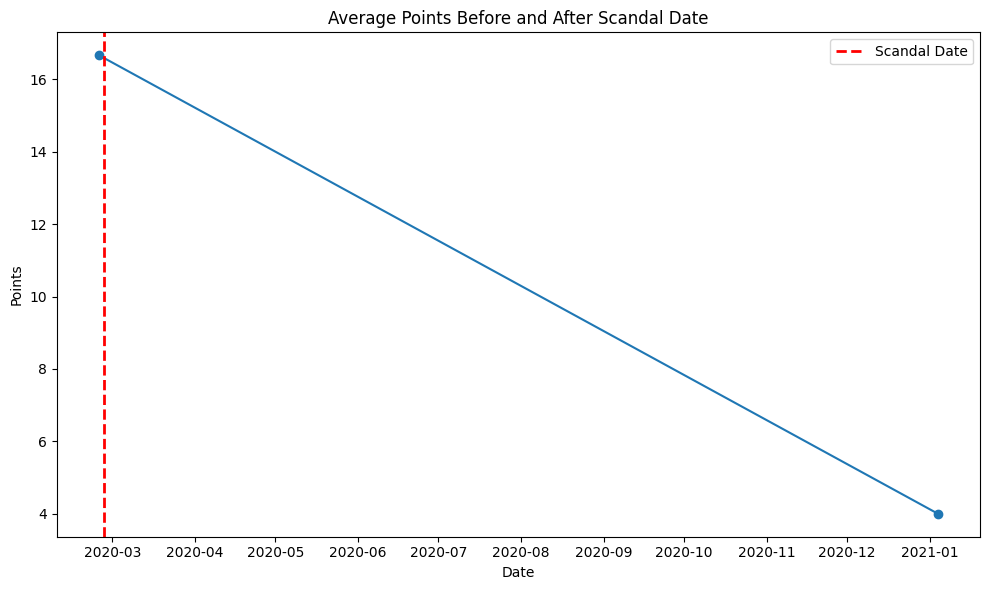

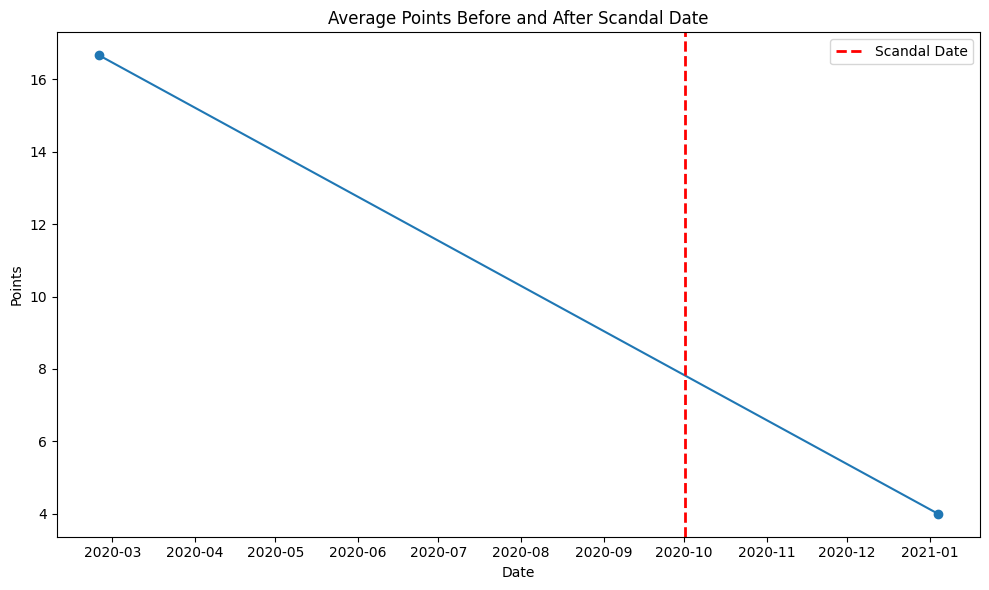

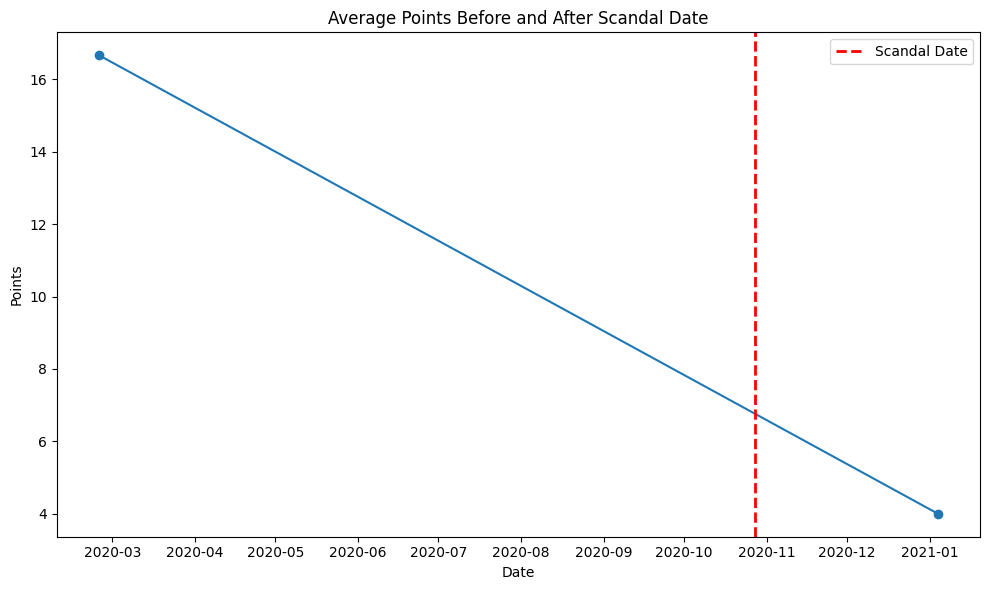

In [58]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

def plot_performance_timeline(stats, tweets, metric, player_col='Player'):
    # Ensure we are working with the correct column names
    if player_col not in stats.columns or 'date' not in tweets.columns:
        raise ValueError("The specified player_col or date column does not exist in the provided DataFrames.")
    
    # Convert dates to pandas datetime format for both stats and tweets
    stats['Date'] = pd.to_datetime(stats['Date'])
    tweets['date'] = pd.to_datetime(tweets['date'])

    # Sort the stats DataFrame based on the Date
    stats.sort_values(by='Date', inplace=True)

    # Get the unique scandal dates from the tweets DataFrame
    scandal_dates = tweets['date'].unique()

    for scandal_date in scandal_dates:
        # Filter the stats for dates before and after the scandal
        before_scandal = stats[stats['Date'] < scandal_date]
        after_scandal = stats[stats['Date'] > scandal_date]

        # Skip if no data is available before or after the scandal date
        if before_scandal.empty or after_scandal.empty:
            continue

        # Get the mean performance before and after the scandal
        mean_before = before_scandal[metric].mean()
        mean_after = after_scandal[metric].mean()

        # Create a DataFrame for plotting
        df_plot = pd.DataFrame({
            'Date': [before_scandal['Date'].iloc[-1], after_scandal['Date'].iloc[0]],
            metric: [mean_before, mean_after]
        })

        # Plotting the timeline
        plt.figure(figsize=(10, 6))
        plt.plot(df_plot['Date'], df_plot[metric], marker='o', linestyle='-')
        plt.axvline(x=scandal_date, color='red', linestyle='--', lw=2, label='Scandal Date')

        # Formatting the plot
        plt.xlabel('Date')
        plt.ylabel(metric)
        plt.title(f'Average {metric} Before and After Scandal Date')
        plt.legend()
        plt.tight_layout()

        # Show the plot
        plt.show()

# Example call for the function
plot_performance_timeline(nba_stats, nba_tweets, 'Points')


# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?

# Team Expectations 


Read over the [COGS108 Team Policies](https://github.com/COGS108/Projects/blob/master/COGS108_TeamPolicies.md) individually. Then, include your group’s expectations of one another for successful completion of your COGS108 project below. Discuss and agree on what all of your expectations are. Discuss how your team will communicate throughout the quarter and consider how you will communicate respectfully should conflicts arise. By including each member’s name above and by adding their name to the submission, you are indicating that you have read the COGS108 Team Policies, accept your team’s expectations below, and have every intention to fulfill them. These expectations are for your team’s use and benefit — they won’t be graded for their details.

* *Team Expectation 1*
* *Team Expectation 2*
* *Team Expecation 3*
* ...

# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data (Ant Man); EDA (Hulk) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin Analysis (Iron Man; Thor) | Discuss/edit Analysis; Complete project check-in |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Wasp)| Discuss/edit full project |
| 3/20  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |